In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [10]:
SRC = '/Users/fathe/OneDrive/Documents/UK/MFF/Thesis/output'
videos = [file for file in os.listdir(SRC) if file.endswith("mp4") and file.startswith("srp")]
SCALE = 1

In [11]:
videos

['srp_GX010027_preprocessed.mp4']

In [12]:
video = videos[0]

In [13]:
vidcap = cv2.VideoCapture(os.path.join(SRC, video))

In [15]:
intervals_horizontal = np.array([[   27,  3012],
 [ 3645,  6630],
 [ 7291, 10277],
 [11022, 14008],
 [14697, 17681],
 [18326, 21311]])
intervals_vertical = np.array([[    0,    26],
 [ 3013, 3644],
 [ 6631,  7290],
 [10278, 11021],
 [14009, 14696],
 [17682, 18325],
 [21312, 21528]])

In [18]:
interval = intervals_horizontal[0]

In [19]:
interval

array([  27, 3012])

In [27]:
start = interval[0] + 50
stop = start + 2818

In [28]:
img_range = range(stop-start)

In [29]:
len(img_range)

2818

In [30]:
stop-start

np.int64(2818)

In [701]:
def is_blurry(frame, threshold=100):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold

In [31]:
feature_params = dict(maxCorners=100,
                          qualityLevel=0.1,
                          minDistance=7,
                          blockSize=7)
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
                 # minEigThreshold = 0.045)
                 
err_threshold = 9

In [703]:
plt.figure(figsize=(16,12*len(img_range)))
# vidcap.set(cv2.CAP_PROP_POS_FRAMES, start)
# pbar = tqdm(total=stop-start)
# blurs = []
for i in img_range:
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, start+i)
    _, frame0 = vidcap.read()
    _, frame1 = vidcap.read()
    frame0 = cv2.cvtColor(cv2.resize(frame0, (int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)/SCALE), int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)/SCALE))), cv2.COLOR_BGR2GRAY)
    frame1 = cv2.cvtColor(cv2.resize(frame1, (int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)/SCALE), int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)/SCALE))), cv2.COLOR_BGR2GRAY)
    
    p0 = cv2.goodFeaturesToTrack(frame0, **feature_params)
    p1, st, err = cv2.calcOpticalFlowPyrLK(frame0, frame1, p0, None, **lk_params)
    # print(err)
    # st = (st == 1) & (err < err_threshold)
    p1 = p1[st == 1]
    p0 = p0[st == 1]
    print(cv2.Laplacian(frame0, cv2.CV_64F).var())
    print(start+i, np.mean(p1-p0, axis=0))
    print(cv2.Laplacian(frame1, cv2.CV_64F).var())

    for p in p0:
        x, y = p
        cv2.circle(frame0, (int(x), int(y)), int(20/SCALE), (0, 255, 0), int(3/SCALE))

    for p in p1:
        x, y = p
        cv2.circle(frame1, (int(x), int(y)), int(20/SCALE), (0, 255, 0), int(3/SCALE))
        
    # blurs.append(cv2.Laplacian(frame0, cv2.CV_64F).var())
    # pbar.update(1)
    

    ax = plt.subplot((stop-start),2,2*i+1)
    ax.imshow(frame0, cmap='gray')
    ax.set_title(i+start)

    ax = plt.subplot((stop-start),2,2*i+2)
    ax.imshow(frame1, cmap='gray')
    ax.set_title(i+start+1)
plt.show()

In [704]:
# np.mean(blurs), np.std(blurs)

In [705]:
# plt.figure(figsize=(15,5))
# plt.plot(img_range, blurs)
# plt.show()

31.355938215325438
[-2.0911226 15.586603 ] (66, 2) (66, 2)
32.126689101473666
24.24907691078604
[-2.456533 23.894663] (41, 2) (41, 2)
24.667878083842993
24.266383015367456
[-2.25553  22.316492] (50, 2) (50, 2)
24.846356870181005
18.21036595553343
[-2.2459402 16.76507  ] (44, 2) (44, 2)
18.632486024829664
23.56446725972339
[-1.5924327 16.833897 ] (67, 2) (67, 2)
23.63845720107524
33.78007223311473
[-3.5652602 24.252619 ] (12, 2) (12, 2)
33.37749156392248


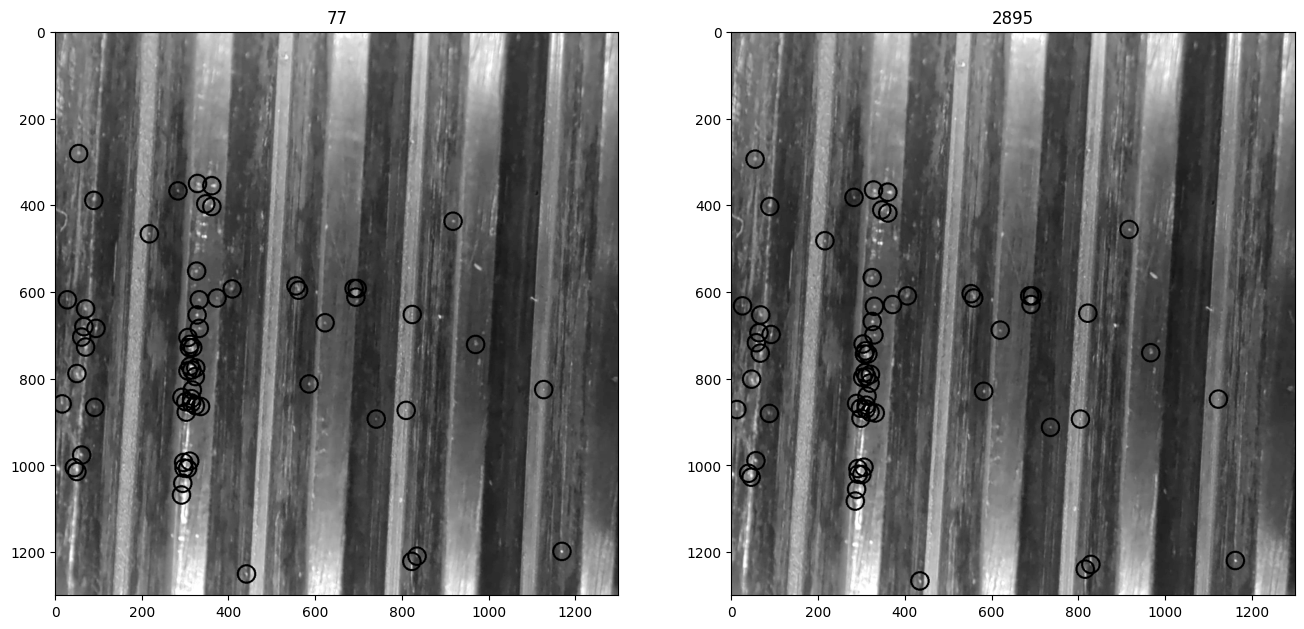

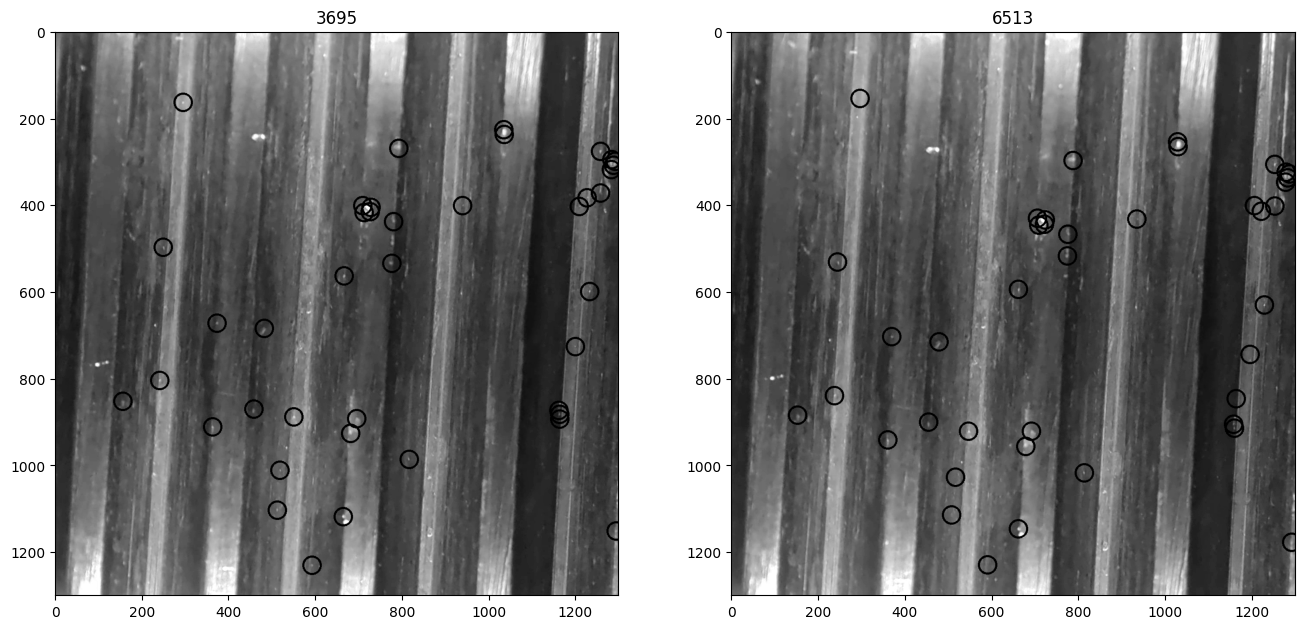

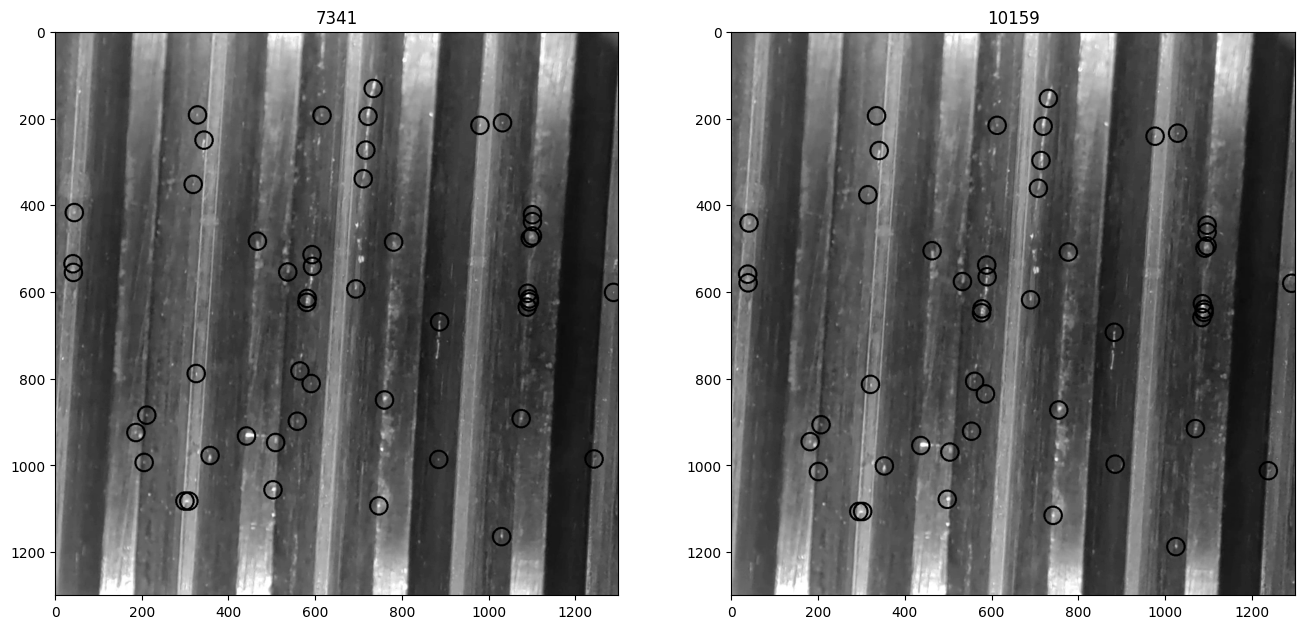

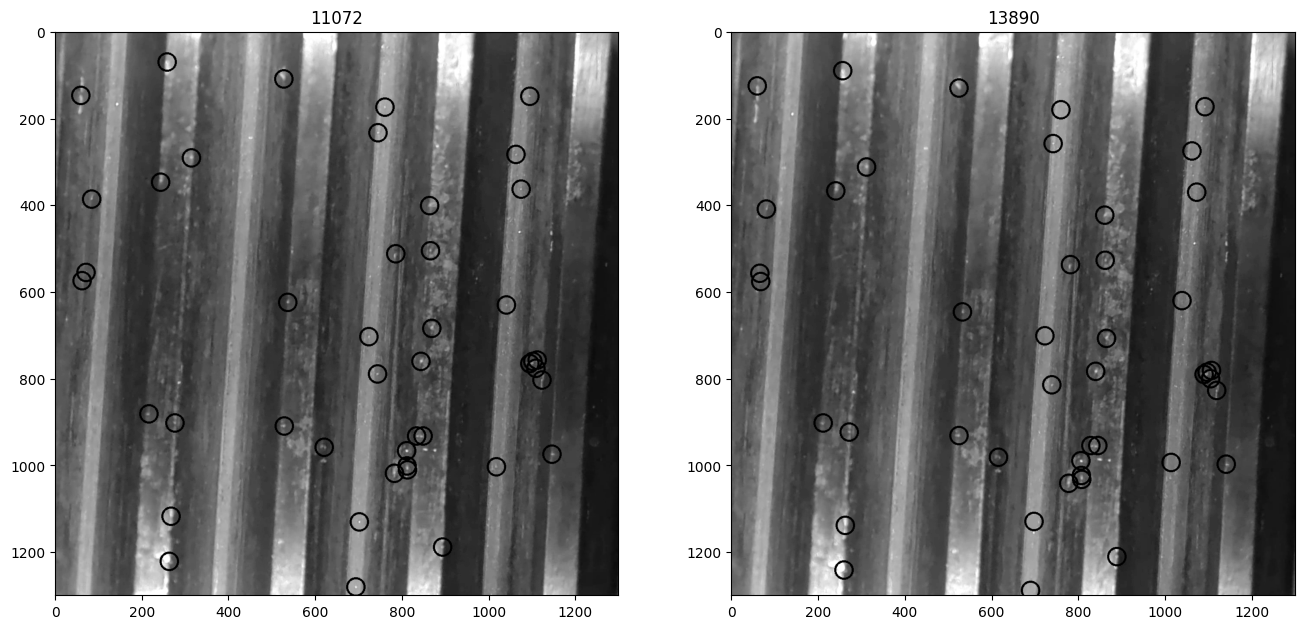

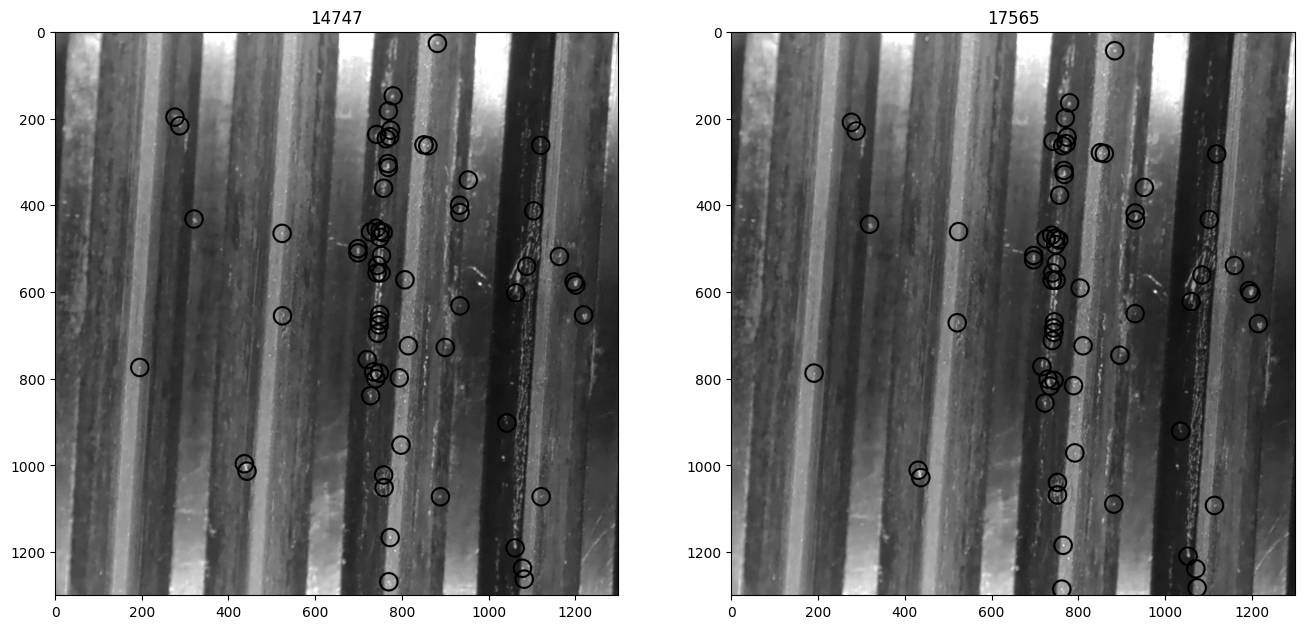

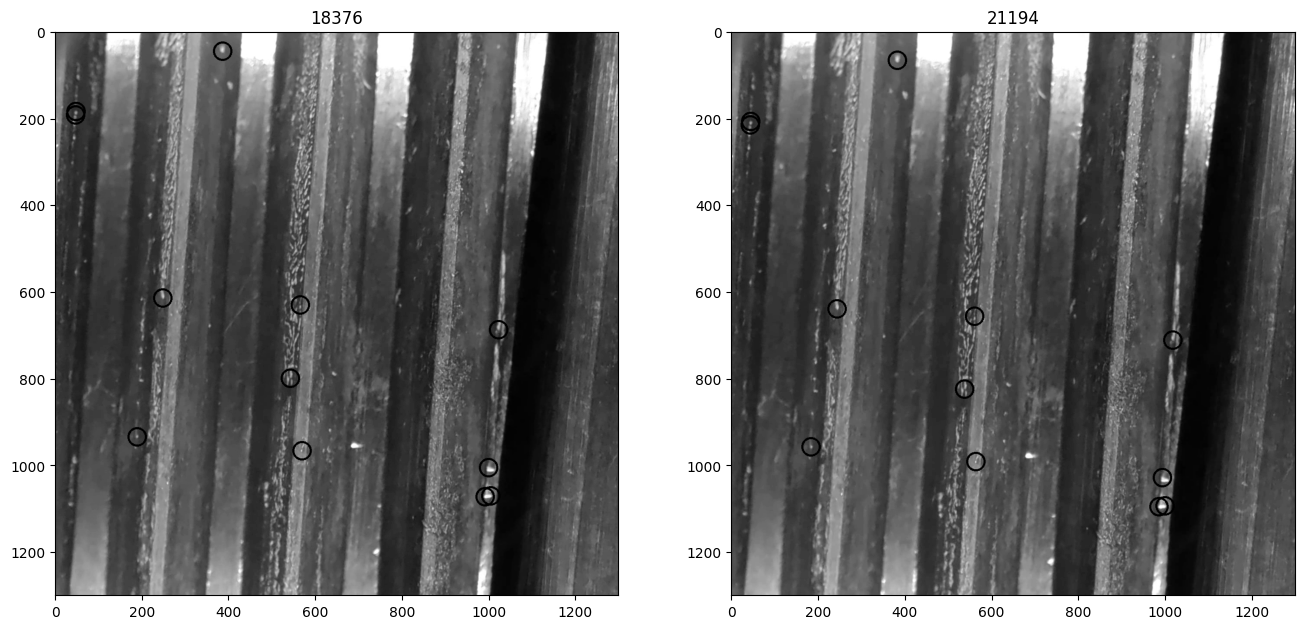

In [37]:
for start, _ in intervals_horizontal:
    start = start + 50
    stop = start + 2818
    plt.figure(figsize=(16,24))

    frame = int(start + 50)
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, start)
    stat_a, a = vidcap.read()
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, stop)
    stat_b, b = vidcap.read()

    if not stat_a:
        print(f"Unable to read frame: {start}")
    elif not stat_b:
        print(f"Unable to read frame: {stop}")
    else:
        err_threshold = 9

        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)

        corners = cv2.goodFeaturesToTrack(a_gray, **feature_params)

        p1, st, err = cv2.calcOpticalFlowPyrLK(a_gray, b_gray, corners, None, **lk_params)

        st = (st == 1) & (err < err_threshold)
        p1 = p1[st == 1]
        p0 = corners[st == 1]

        print(cv2.Laplacian(a_gray, cv2.CV_64F).var())
        move = np.mean(p1 - p0, axis=0)
        print(move, p1.shape, p0.shape)
        print(cv2.Laplacian(b_gray, cv2.CV_64F).var())

        for p in p0:
            x, y = p
            cv2.circle(a_gray, (int(x), int(y)), int(20/SCALE), (0, 255, 0), int(3/SCALE))

        for p in p1:
            x, y = p
            cv2.circle(b_gray, (int(x), int(y)), int(20/SCALE), (0, 255, 0), int(3/SCALE))

        # blurs.append(cv2.Laplacian(frame0, cv2.CV_64F).var())
        # pbar.update(1)


        ax = plt.subplot(1,2,1)
        ax.imshow(a_gray, cmap='gray')
        ax.set_title(start)

        ax = plt.subplot(1,2,2)
        ax.imshow(b_gray, cmap='gray')
        ax.set_title(stop)



        # result = np.ceil(frame_shift + move[0] / abs(self.speeds['horizontal'])).astype(int)
        # # print(result)
        #
        # print(result)